<a href="https://colab.research.google.com/github/KengoTobita/python_startup/blob/master/python_timeserise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from bs4 import BeautifulSoup
import requests

In [0]:
url = "http://www.data.jma.go.jp/obd/stats/etrn/view/hourly_s1.php?prec_no=44&block_no=47662&year=2000&month=1&day=1&view="

In [3]:
response = requests.get(url)
print(response.text)
soup = BeautifulSoup(response.text, "html.parser")

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html xmlns="http://www.w3.org/1999/xhtml" xml:lang="ja" lang="ja">
<head>
<meta http-equiv="Content-Type" content="text/html; charset=UTF-8" />
<title>æ°è±¡åºï½éå»ã®æ°è±¡ãã¼ã¿æ¤ç´¢</title>
<meta name="Author" content="æ°è±¡åº Japan Meteorological Agency" />
<meta name="keywords" content="æ°è±¡åº Japan Meteorological Agency" />
<meta name="description" content="æ°è±¡åºï½éå»ã®æ°è±¡ãã¼ã¿æ¤ç´¢" />
<meta http-equiv="Content-Style-Type" content="text/css" />
<meta http-equiv="Content-Script-Type" content="text/javascript" />
<link rel="stylesheet" type="text/css" href="/com/css/define.css" media="all" />
<link rel="stylesheet" type="text/css" href="../../css/default.css" media="all" />
<script language="JavaScript" type="text/JavaScript" src="../js/jquery.js"></script>
<script language="JavaScript" type="text/JavaScript" src="../js/jquery.ta

In [7]:
for i in soup.find_all("table"):
  print(len(i))

1
1
1
1
53
1
3


In [12]:
table_rowdata = soup.find_all("table")[4]
print(table_rowdata)

<table class="data2_s" id="tablefix1">
<tr class="mtx"><th rowspan="2" scope="col">æ</th><th colspan="2" scope="colgroup">æ°å§(hPa)</th><th rowspan="2" scope="col">éæ°´é<br/>(mm)</th><th rowspan="2" scope="col">æ°æ¸©<br/>(â)</th><th rowspan="2" scope="col">é²ç¹<br/>æ¸©åº¦<br/>(â)</th><th rowspan="2" scope="col">è¸æ°å§<br/>(hPa)</th><th rowspan="2" scope="col">æ¹¿åº¦<br/>(ï¼)</th><th colspan="2" scope="colgroup">é¢¨åã»é¢¨é(m/s)</th><th rowspan="2" scope="col">æ¥ç§<br/>æé<br/>(h)</th><th rowspan="2" scope="col">å¨å¤©<br/>æ¥å°é<br/>(MJ/ã¡)</th><th colspan="2" scope="colgroup">éª(cm)</th><th rowspan="2" scope="col">å¤©æ°</th><th rowspan="2" scope="col">é²é</th><th rowspan="2" scope="col">è¦ç¨<br/>(km)</th></tr>
<tr class="mtx"><th scope="col">ç¾å°</th><th scope="col">æµ·é¢</th><th scope="col">é¢¨é</th><th scope="col">é¢¨å</th><th scope="col">ééª</th><th scope="col">ç©éª</th></tr>
<tr class="mtx" style="text-align:right;"><td style="whi

In [17]:
tmp = [td.text for td in table_rowdata.find_all("td")]

tmp[:20]

['1',
 '1015.4',
 '1019.8',
 '--',
 '6.7',
 '2.8',
 '7.5',
 '76',
 '1.7',
 'å\x8c\x97å\x8c\x97è¥¿',
 '',
 '',
 '',
 '--',
 '',
 '',
 '',
 '2',
 '1015.4',
 '1019.8']

In [19]:
tmp[4::17]

['6.7',
 '6.6',
 '6.1',
 '6.4',
 '6.3',
 '6.8',
 '6.3',
 '6.5',
 '8.8',
 '11.0',
 '11.4',
 '11.8',
 '12.3',
 '12.3',
 '11.9',
 '11.1',
 '10.4',
 '9.6',
 '8.9',
 '8.1',
 '7.4',
 '7.0',
 '6.4',
 '6.6']

#  データ作成

In [22]:
from bs4 import BeautifulSoup
import requests

url = "http://www.data.jma.go.jp/obd/stats/etrn/view/hourly_s1.php?prec_no=44&block_no=47662&year=2000&month=1&day=1&view="

response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")

table_rowdata = soup.find_all("table")[4]
tds = [td.text for td in table_rowdata.find_all("td")]

tds_tmpr = tds[4::17]
print(tds_tmpr)

['6.7', '6.6', '6.1', '6.4', '6.3', '6.8', '6.3', '6.5', '8.8', '11.0', '11.4', '11.8', '12.3', '12.3', '11.9', '11.1', '10.4', '9.6', '8.9', '8.1', '7.4', '7.0', '6.4', '6.6']


In [30]:
import calendar as cl

for year in [2000+i for i in range(19)]:
  for month in [1+i for i in range(12)]:
    print(list(cl.itermonthdays(year, month)))

AttributeError: ignored

In [69]:
from bs4 import BeautifulSoup
import requests
from datetime import datetime
from datetime import timedelta

start = datetime.strptime('200001', '%Y%m').date()
end = datetime.strptime('201812', '%Y%m').date()

date_list=[]
data_list = []

for n in range((end - start).days):
  date_list.append(start + timedelta(n))

for i in date_list:
  print(str(i))
  
# -------------------------------------------------------------

  url = "http://www.data.jma.go.jp/obd/stats/etrn/view/hourly_s1.php?prec_no=44&block_no=47662&year="+str(i)[:4]+"&month="+str(i)[5:7]+"&day="+str(i)[8:]+"&view="
  print(url)
  response = requests.get(url)
  soup = BeautifulSoup(response.text, "html.parser")

  table_rowdata = soup.find_all("table")[4]
  tds = [td.text for td in table_rowdata.find_all("td")]

  tds_tmpr = tds[4::17]
  data_list.append(tds_tmpr)
  

2000-01-01
http://www.data.jma.go.jp/obd/stats/etrn/view/hourly_s1.php?prec_no=44&block_no=47662&year=2000&month=01&day=01&view=
2000-01-02
http://www.data.jma.go.jp/obd/stats/etrn/view/hourly_s1.php?prec_no=44&block_no=47662&year=2000&month=01&day=02&view=
2000-01-03
http://www.data.jma.go.jp/obd/stats/etrn/view/hourly_s1.php?prec_no=44&block_no=47662&year=2000&month=01&day=03&view=
2000-01-04
http://www.data.jma.go.jp/obd/stats/etrn/view/hourly_s1.php?prec_no=44&block_no=47662&year=2000&month=01&day=04&view=
2000-01-05
http://www.data.jma.go.jp/obd/stats/etrn/view/hourly_s1.php?prec_no=44&block_no=47662&year=2000&month=01&day=05&view=
2000-01-06
http://www.data.jma.go.jp/obd/stats/etrn/view/hourly_s1.php?prec_no=44&block_no=47662&year=2000&month=01&day=06&view=
2000-01-07
http://www.data.jma.go.jp/obd/stats/etrn/view/hourly_s1.php?prec_no=44&block_no=47662&year=2000&month=01&day=07&view=
2000-01-08
http://www.data.jma.go.jp/obd/stats/etrn/view/hourly_s1.php?prec_no=44&block_no=47662&

In [84]:
print(data_list)
print(len(data_list))

[['6.7', '6.6', '6.1', '6.4', '6.3', '6.8', '6.3', '6.5', '8.8', '11.0', '11.4', '11.8', '12.3', '12.3', '11.9', '11.1', '10.4', '9.6', '8.9', '8.1', '7.4', '7.0', '6.4', '6.6'], ['6.2', '5.9', '5.1', '5.1', '5.2', '5.0', '4.3', '4.4', '5.3', '5.6', '6.6', '7.6', '8.3', '8.2', '8.2', '8.3', '8.5', '8.6', '8.6', '8.4', '8.6', '8.5', '8.2', '7.9'], ['6.8', '6.1', '5.9', '6.2', '5.2', '5.4', '4.8', '5.2', '6.7', '9.2', '10.2', '13.0', '15.4', '14.0', '12.9', '12.2', '11.7', '10.1', '11.2', '11.1', '10.1', '9.4', '9.0', '8.7'], ['8.1', '7.9', '7.8', '7.7', '7.5', '7.7', '7.7', '8.3', '9.3', '10.5', '11.6', '12.4', '12.8', '13.7', '13.4', '13.2', '11.7', '11.3', '10.3', '9.5', '8.9', '8.5', '8.2', '7.8'], ['8.0', '7.8', '7.6', '7.2', '7.2', '7.0', '6.4', '7.0', '8.0', '9.2', '9.3', '11.0', '10.6', '11.0', '11.2', '10.7', '10.7', '10.9', '10.9', '10.6', '10.7', '10.4', '10.3', '10.0'], ['9.4', '8.7', '8.4', '8.3', '8.4', '8.5', '8.7', '9.0', '9.8', '9.7', '10.1', '12.5', '12.0', '12.4', '12.

In [0]:
data_list = [[float(j) for j in i] for i in data_list]

In [92]:
import numpy as np

data_list = np.array(data_list)
data_list = data_list.flatten()

print(data_list)
print(len(data_list))

[ 6.7  6.6  6.1 ... 12.1 11.8 10.7]
165816


In [122]:
import pandas as pd

str_index = [str(i)for i in date_list]

index_date = []
for i_day in str_index:
  for i_time in range(24):
    tmp = i_day + "-" +str(i_time)
    index_date.append(tmp)

print(len(index_date))
df = pd.Series(data_list, index=index_date)

165816


In [129]:
df

2000-01-01-0      6.7
2000-01-01-1      6.6
2000-01-01-2      6.1
2000-01-01-3      6.4
2000-01-01-4      6.3
2000-01-01-5      6.8
2000-01-01-6      6.3
2000-01-01-7      6.5
2000-01-01-8      8.8
2000-01-01-9     11.0
2000-01-01-10    11.4
2000-01-01-11    11.8
2000-01-01-12    12.3
2000-01-01-13    12.3
2000-01-01-14    11.9
2000-01-01-15    11.1
2000-01-01-16    10.4
2000-01-01-17     9.6
2000-01-01-18     8.9
2000-01-01-19     8.1
2000-01-01-20     7.4
2000-01-01-21     7.0
2000-01-01-22     6.4
2000-01-01-23     6.6
2000-01-02-0      6.2
2000-01-02-1      5.9
2000-01-02-2      5.1
2000-01-02-3      5.1
2000-01-02-4      5.2
2000-01-02-5      5.0
                 ... 
2018-11-29-18    13.0
2018-11-29-19    13.1
2018-11-29-20    12.6
2018-11-29-21    12.3
2018-11-29-22    11.7
2018-11-29-23    12.2
2018-11-30-0     11.2
2018-11-30-1     11.1
2018-11-30-2     10.3
2018-11-30-3     10.3
2018-11-30-4      9.5
2018-11-30-5      8.8
2018-11-30-6      8.7
2018-11-30-7      9.7
2018-11-30

# Pandas 

In [120]:
import pandas as pd
from io import StringIO
import sys

csv_data = \
'''A,B,C,D
1.0,2.0,3.0,4.0
5.0,6.0,,8.0
10.0,11.0,12.0,'''

# If you are using Python 2.7, you need
# to convert the string to unicode:

if (sys.version_info < (3, 0)):
    csv_data = unicode(csv_data)

df_ex = pd.read_csv(StringIO(csv_data))
df_ex

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [121]:
df_ex.isnull()

,A,B,C,D
0,False,False,False,False
1,False,False,True,False
2,False,False,False,True


In [124]:
df_ex.dropna()

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [125]:
df_ex.head()

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [131]:
df_ex.mean()

A    5.333333
B    6.333333
C    7.500000
D    6.000000
dtype: float64

In [127]:
df_ex.describe()

,A,B,C,D
count,3.000000,3.000000,2.000000,2.000000
mean,5.333333,6.333333,7.500000,6.000000
std,4.509250,4.509250,6.363961,2.828427
min,1.000000,2.000000,3.000000,4.000000
25%,3.000000,4.000000,5.250000,5.000000
50%,5.000000,6.000000,7.500000,6.000000
75%,7.500000,8.500000,9.750000,7.000000
max,10.000000,11.000000,12.000000,8.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9d348e4e80>,
      dtype=object)

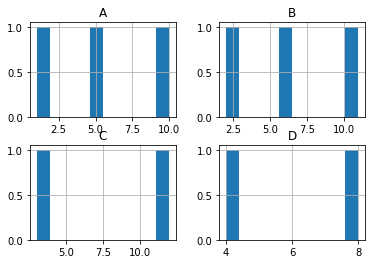

In [132]:
df_ex.hist()

# matplotlib

x is ...  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
y is ...  [0, 1, 4, 9, 16, 25, 36, 49, 64, 81]


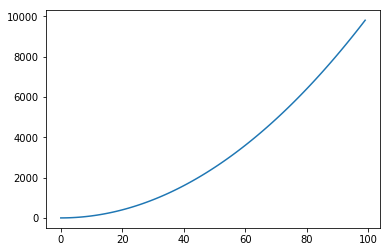

In [116]:
import matplotlib.pyplot as plt 
import numpy as np 

x = [i for i in range(100)]
y = [i**2 for i in x]

print("x is ... ", x[:10])
print("y is ... ", y[:10])
plt.plot(x,y)

No handles with labels found to put in legend.


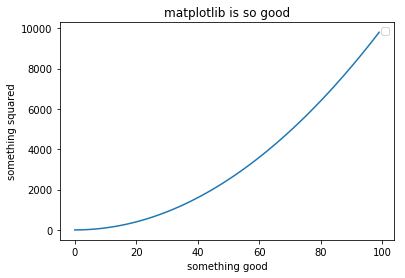

In [112]:
import matplotlib.pyplot as plt 
import numpy as np 

x = [i for i in range(100)]
y = [i**2 for i in x]

plt.plot(x,y)
plt.xlabel("something good")
plt.ylabel("something squared")
plt.title("matplotlib is so good")
plt.legend(loc="best")

plt.savefig("とりあえず保存.png")

In [94]:
!ls

sample_data  とりあえず保存.png


#  今回のデータで......

In [134]:
df.head(5)

2000-01-01-0    6.7
2000-01-01-1    6.6
2000-01-01-2    6.1
2000-01-01-3    6.4
2000-01-01-4    6.3
dtype: float64

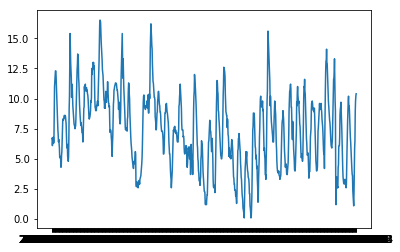

In [139]:
plt.plot(df[:999])

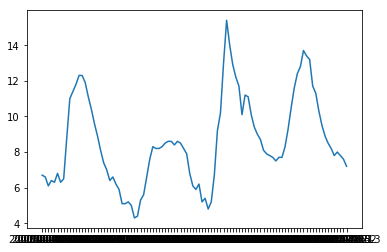

In [137]:
plt.plot(df[:100])

latest ...  16.691130136986185
long long ago ...... 16.942397260273943


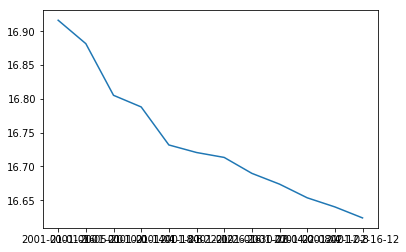

In [161]:
roll_mean = df.rolling(window=(24*365)).mean()

print("latest ... ", roll_mean[-1])
print("long long ago ......", roll_mean[40000])

plt.plot(roll_mean[:10000:100])